In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import datetime

In [2]:
out_freq = "3H"

# interpsondedir = f'/global/cscratch1/sd/feng045/iclass/cacti/arm/interpsondeM1/'
# interpsonde_file = f'{interpsondedir}corinterpolatedsondeM1.c1.20181010_20190302.nc'
# outfile = f'/global/project/projectdirs/m1657/zfeng/cacti/arm/sounding_stats/corinterpolatedsondeM1.c1.20181010_20190302_interp{out_freq}.nc'

interpsondedir = f'/global/cscratch1/sd/feng045/iclass/cacti/arm/mergesondeM1/'
interpsonde_file = f'{interpsondedir}cormergesonde2maceM1.c1.20181005_20190430.nc'
# interpsonde_file = f'{interpsondedir}test.nc'
outfile = f'/global/project/projectdirs/m1657/zfeng/cacti/arm/sounding_stats/cormergesonde2maceM1.c1.20181005_20190430_resample{out_freq}.nc'

In [3]:
xr.set_options(display_style='text')

In [4]:
ds = xr.open_dataset(interpsonde_file)
ds

<xarray.Dataset>
Dimensions:                            (height: 316, time: 299520)
Coordinates:
  * time                               (time) datetime64[ns] 2018-10-05T00:00...
  * height                             (height) float32 1.141 1.161 ... 61.14
Data variables: (12/59)
    base_time                          datetime64[ns] ...
    time_offset                        (time) datetime64[ns] ...
    precip                             (time) float32 ...
    qc_precip                          (time) int32 ...
    temp                               (time, height) float32 ...
    qc_temp                            (time, height) int32 ...
    ...                                 ...
    qc_u_wind_interpolatedsonde        (time, height) int32 ...
    v_wind_interpolatedsonde           (time, height) float32 ...
    qc_v_wind_interpolatedsonde        (time, height) int32 ...
    lat                                float32 ...
    lon                                float32 ...
    alt                                float32 ...
Attributes: (12/15)
    command_line:          idl -R -n mergesonde2mace -s cor -f M1 -b 20181005...
    Conventions:           ARM-1.3
    process_version:       vap-mergesonde2mace-1.0-0.dev2.dirty.el7
    input_datastreams:     corera5plevelsM1.a1 : Unknown : 20181004.000000-20...
    dod_version:           mergesonde2mace-c1-4.0
    site_id:               cor
    ...                    ...
    location_description:  Cloud, Aerosol, and Complex Terrain Interactions (...
    datastream:            cormergesonde2maceM1.c1
    reference:             Technical document ("Merged Sounding Value-Added P...
    doi:                   10.5439/1095335
    history:               Fri Mar 19 16:18:38 2021: ncrcat cormergesonde2mac...
    NCO:                   netCDF Operators version 4.7.9 (Homepage = http://...

In [5]:
# time_out = pd.date_range("2018-10-05T00", "2019-04-30T23", freq="3H")
# time_out = pd.date_range("2019-1-24T00", "2019-01-25T23", freq="3H")
# time_out

In [6]:
# time_out = pd.date_range("2018-10-10T00", "2019-3-3T00", freq=out_freq)
# time_out

In [7]:
dsout = ds.resample(time=out_freq, keep_attrs=True).nearest(tolerance='1min')
dsout

<xarray.Dataset>
Dimensions:                            (height: 316, time: 1664)
Coordinates:
  * time                               (time) datetime64[ns] 2018-10-05 ... 2...
  * height                             (height) float32 1.141 1.161 ... 61.14
Data variables: (12/59)
    base_time                          datetime64[ns] ...
    time_offset                        (time) datetime64[ns] ...
    precip                             (time) float32 ...
    qc_precip                          (time) int32 ...
    temp                               (time, height) float32 ...
    qc_temp                            (time, height) int32 ...
    ...                                 ...
    qc_u_wind_interpolatedsonde        (time, height) int32 ...
    v_wind_interpolatedsonde           (time, height) float32 ...
    qc_v_wind_interpolatedsonde        (time, height) int32 ...
    lat                                float32 ...
    lon                                float32 ...
    alt                                float32 ...
Attributes: (12/15)
    command_line:          idl -R -n mergesonde2mace -s cor -f M1 -b 20181005...
    Conventions:           ARM-1.3
    process_version:       vap-mergesonde2mace-1.0-0.dev2.dirty.el7
    input_datastreams:     corera5plevelsM1.a1 : Unknown : 20181004.000000-20...
    dod_version:           mergesonde2mace-c1-4.0
    site_id:               cor
    ...                    ...
    location_description:  Cloud, Aerosol, and Complex Terrain Interactions (...
    datastream:            cormergesonde2maceM1.c1
    reference:             Technical document ("Merged Sounding Value-Added P...
    doi:                   10.5439/1095335
    history:               Fri Mar 19 16:18:38 2021: ncrcat cormergesonde2mac...
    NCO:                   netCDF Operators version 4.7.9 (Homepage = http://...

In [8]:
# dsout = ds.interp(time=time_out, method='linear')
# dsout

In [9]:
# Convert height coordinates to AGL
# dsout['height'] = dsout.height - 1.141
dsout['height'].attrs = ds['height'].attrs
# dsout['height'].attrs['comment'] = 'Height represents km above ground level'

(0.0, 4.0)

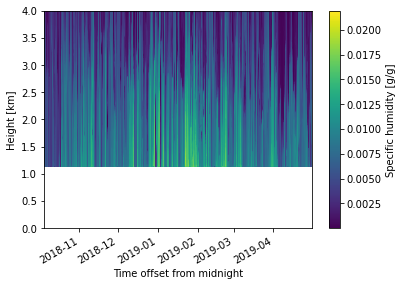

In [10]:
dsout['sh'].transpose().plot()
plt.ylim(0,4)

(0.0, 4.0)

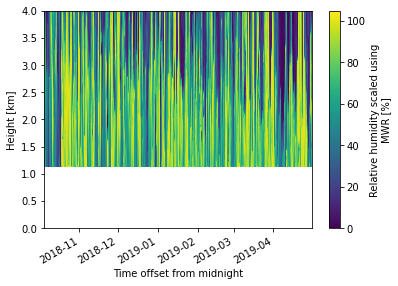

In [11]:
dsout['rh_scaled'].transpose().plot()
plt.ylim(0,4)

In [12]:
# Write netCDF file:
# Set encoding/compression for all variables
comp = dict(zlib=True, dtype='float32')
encoding = {var: comp for var in dsout.data_vars}
# Update base_time variable dtype as 'double' for better precision
bt_dict = {'base_time': {'zlib':True, 'dtype':'float64'},
#            'time_offset': {'zlib':True, 'dtype':'float64'},
           'time': {'zlib':True, 'dtype':'float64'}}
encoding.update(bt_dict)

# Write to netcdf file
dsout.to_netcdf(path=outfile, mode='w', format='NETCDF4_CLASSIC', unlimited_dims='time', encoding=encoding)
print(f'Output saved as: {outfile}')

Output saved as: /global/project/projectdirs/m1657/zfeng/cacti/arm/sounding_stats/cormergesonde2maceM1.c1.20181005_20190430_resample3H.nc
